## Data Description

The data used in this work is credited to the work carried away by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

This data has to do with a red wine quality of a Portuguese "Vinho Verde" wine and comprises physicochemical properties of the wine. These characteristics were obtained from May/2004 to February/2007 when samples were tested at the official certification entity - CVRVV - whose goal is to improve the quality and marketing of vinho verde.
It is composed by 1599 entries, each row being a diferent wine sample and each collumn being a physicochemical test performed on the sample, having a total of 11 tests performed. There is a 12th collumn, which corresponds to the final rating the wine received. Details on the data and its purposes can be found at [Cortez et al., 2009].

The phisicochemical tests are:
- Fixed acidity (mg/L): Acids are a major component of wine. Fixed acids are the acids that originally produced in the grape or later during the fermentation process by yeast, and therefore nonvolatile. These are tartaric, malic, citric (all produced by the grape) and succinic (by the yeast). Type: double;
- Volatile acidity (mg/L): These are the acids formed as a byproduct of fermentation and are released as steam. It is almost only acetic acid but it can also be lactic, formic, butyric, and propionic acids. Type: double;
- Citric acid (mg/L): An organic weak acid and therefore used to preserve the wine and stop microbial and mold activity. Can also be added to increase the acidity of flavor of the wine. Type: double;
- Residual sugar (g/L): Residual sugars refer to the natural sugars present in grapes (glucose, fructose) that remain in the wine even after fermentation takes place. Type: double;
- Chlorides (g/L): Chlorides are eletrolytes and can therefore help reducing wine acidity. Type: double;
- Free sulfur dioxide (mg/L): Used to calculate the amount of sulfur dioxide used, it is the sulfur dioxide that did not bind with any other molecule. Type: double;
- Total sulfur dioxide (mg/L): Sulfur dioxide is used throughout winemaking stages to prevent oxidation and microbial growth;
- Density (g/mL): Mass per volume of wine, used to estimate the quality of the wine. Type: double;
- pH: Measures the acidity of the wine in the pH scale. All wines lie on the acidic range (2.5-4.5). Type: double;
- Sulphates (g/L): This should be sulfites and not sulphates, as the firsts are not used in wine making. Sulfites occurr naturaly in grapes and act as a preservative by inhibiting microbial growth. Type: double;
- Alcohol (%): Percentage of alcohol per volume, the direct product of fermentation. Type: double;

The last feature, corresponding to the rating, was obtained by using at least three sensory assessors (using blind tastes) which attributed a rating from 0 (very bad) to 10 (excellent). The final rating is the average of the ratings. The type of this feature is therefore, int. 

## Data Analysis

In [1]:
library(e1071)
library(ggplot2)
library(GGally)
require(gridExtra)
library(purrr)
library(tidyr)
library(reshape)
library(FSA)
library(dplyr)
library(repr)
source("stratified.r")
set.seed(123)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: gridExtra


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


## FSA v0.8.30. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:GGally’:

    nasa


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
raw_data = read.csv('winequality-red.csv')
raw_data$quality = factor(raw_data$quality)

In [3]:
head(raw_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
summary(raw_data)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [14]:
data = stratified(raw_data, 'quality', 25)

Some groups
---3, 8---
contain fewer observations than desired number of samples.
All observations have been returned from those groups.



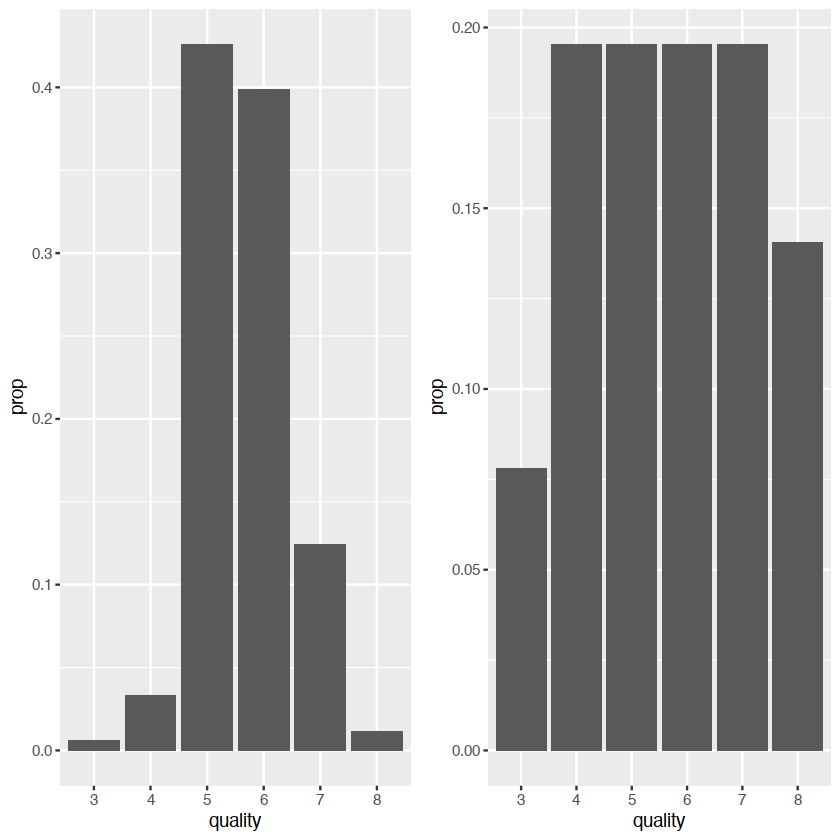

In [15]:
# check proportions are still the same
raw_plot = ggplot(raw_data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
strat_plot = ggplot(data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
grid.arrange(raw_plot, strat_plot, ncol=2)

In [16]:
summary(data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar 
 Min.   : 5.000   Min.   :0.1200   Min.   :0.0000   Min.   :1.200  
 1st Qu.: 7.100   1st Qu.:0.3800   1st Qu.:0.0475   1st Qu.:1.800  
 Median : 8.000   Median :0.5550   Median :0.2500   Median :2.100  
 Mean   : 8.379   Mean   :0.5636   Mean   :0.2641   Mean   :2.503  
 3rd Qu.: 9.600   3rd Qu.:0.6625   3rd Qu.:0.4225   3rd Qu.:2.625  
 Max.   :15.500   Max.   :1.5800   Max.   :1.0000   Max.   :7.900  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.04400   Min.   : 3.00       Min.   :  7.00       Min.   :0.9908  
 1st Qu.:0.07000   1st Qu.: 6.00       1st Qu.: 16.00       1st Qu.:0.9955  
 Median :0.08000   Median :10.00       Median : 24.50       Median :0.9966  
 Mean   :0.09167   Mean   :12.88       Mean   : 33.67       Mean   :0.9965  
 3rd Qu.:0.09100   3rd Qu.:16.25       3rd Qu.: 47.00       3rd Qu.:0.9975  
 Max.   :0.61000   Max.   :68.00       Max.   :135.00       Ma

Qualities 3, 4 and 8 will be removed for only having 1, 5 and 2 samples, respectively.

In [17]:
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
691,7.4,1.185,0.00,4.25,0.097,5,14,0.99660,3.63,0.54,10.70,3
1479,7.1,0.875,0.05,5.70,0.082,3,14,0.99808,3.40,0.52,10.20,3
518,10.4,0.610,0.49,2.10,0.200,5,16,0.99940,3.16,0.63,8.40,3
1375,6.8,0.815,0.00,1.20,0.267,16,29,0.99471,3.32,0.51,9.80,3
1300,7.6,1.580,0.00,2.10,0.137,5,9,0.99476,3.50,0.40,10.90,3
1506,6.7,0.760,0.02,1.80,0.078,6,12,0.99600,3.55,0.63,9.95,3


# Bivariate analysis

In [18]:
library(FactoMineR)

Warning message in ggscatmat(data, color = "quality", alpha = 0.8):
“Factor variables are omitted in plot”


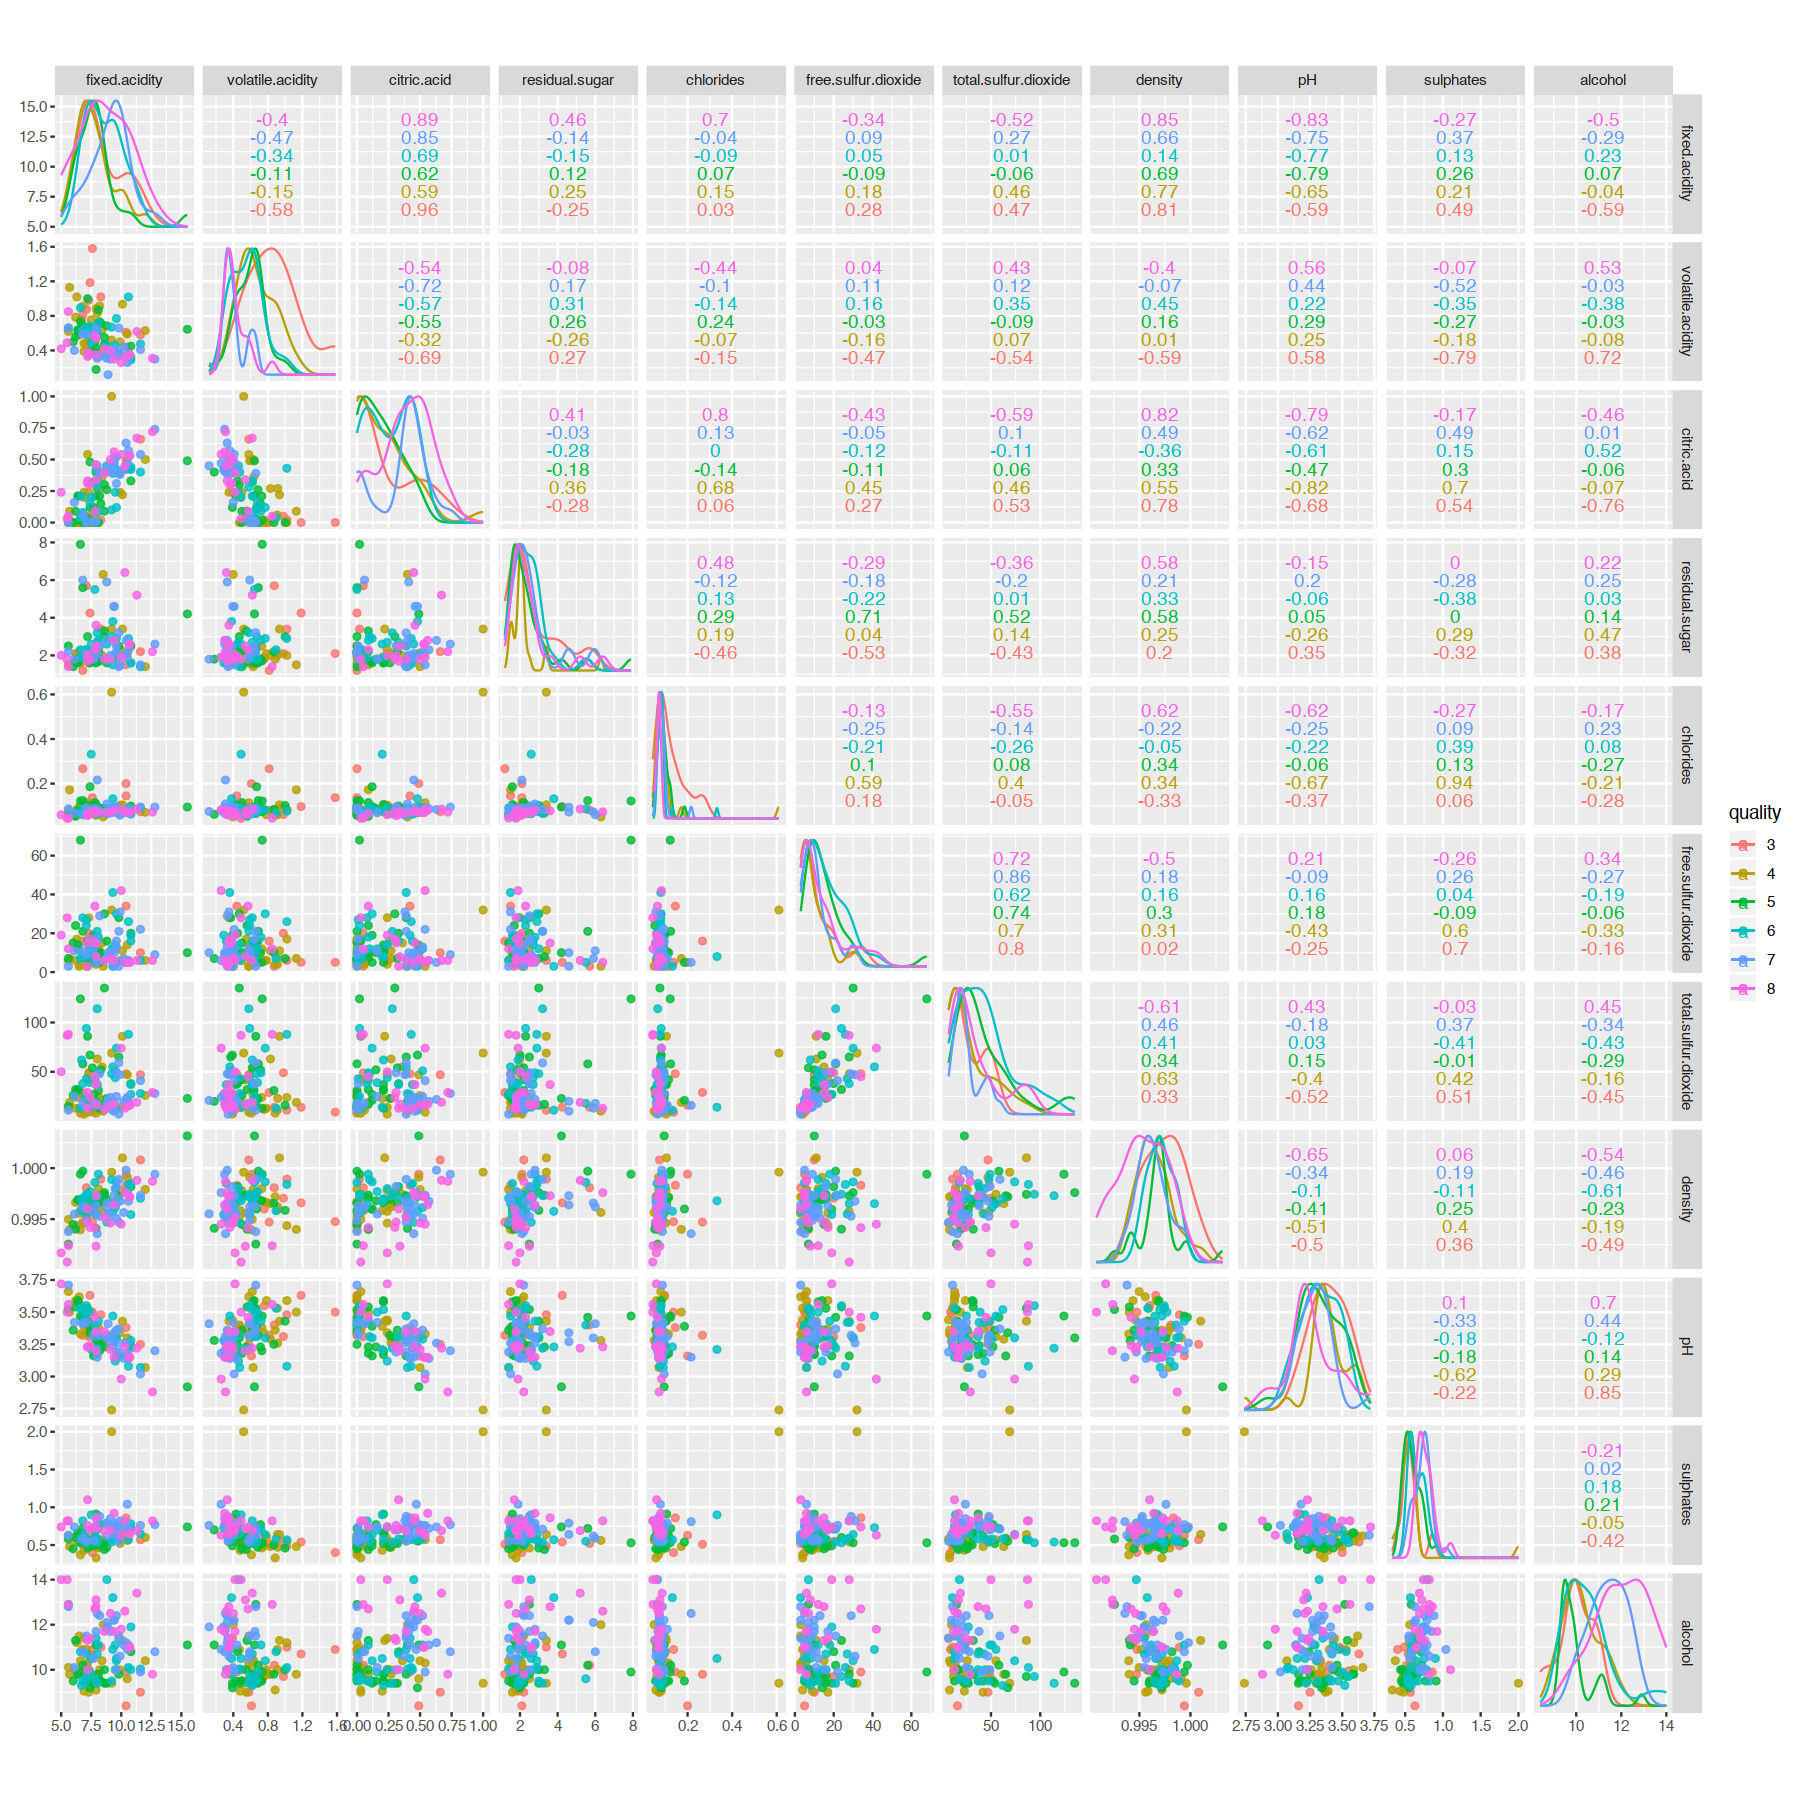

In [19]:
options(repr.plot.width=15, repr.plot.height=15)
ggscatmat(data, color="quality", alpha=0.8)

Some variables are highly correlated:
 - citric.acid and fixed.acidity, for the higher quality wines (6 and 7)
 - density and fixed.acidity, for all categories, in particular the higher
 - density and citric.acid have a high correlation for quality 7
 - total.sulfur.dioxide and free.sulfur.dioxide also have relatively high correlation for all qualities, but higher for 5 and 7.

# APENAS TESTES DAQUI PARA BAIXO

In [11]:
#for (i in 1:4) {
#    for (j in (i+1):5) {
#        print(paste0(i, '-', j))
#        CA(data, graph=TRUE, axes=c(i, j))
#    }
#}

### http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/

In [12]:
res.famd <- FAMD(data, ncp = 10, graph = FALSE)
print(res.famd)

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"


In [13]:
library("factoextra")
eig.val <- get_eigenvalue(res.famd)
eig.val

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.1279185,24.060911,24.06091
Dim.2,2.5956416,19.966474,44.02739
Dim.3,1.6401329,12.616407,56.64379
Dim.4,1.3535678,10.412060,67.05585
Dim.5,0.9716169,7.473976,74.52983
Dim.6,0.8416543,6.474264,81.00409
Dim.7,0.6916695,5.320535,86.32463
Dim.8,0.5564568,4.280437,90.60506
Dim.9,0.4268651,3.283578,93.88864
Dim.10,0.3600643,2.769726,96.65837


We would need 6 dimensions to explain the usual 80% of the dataset. On the scree plot below, the percentage of inertia expained for each dimension is represented.

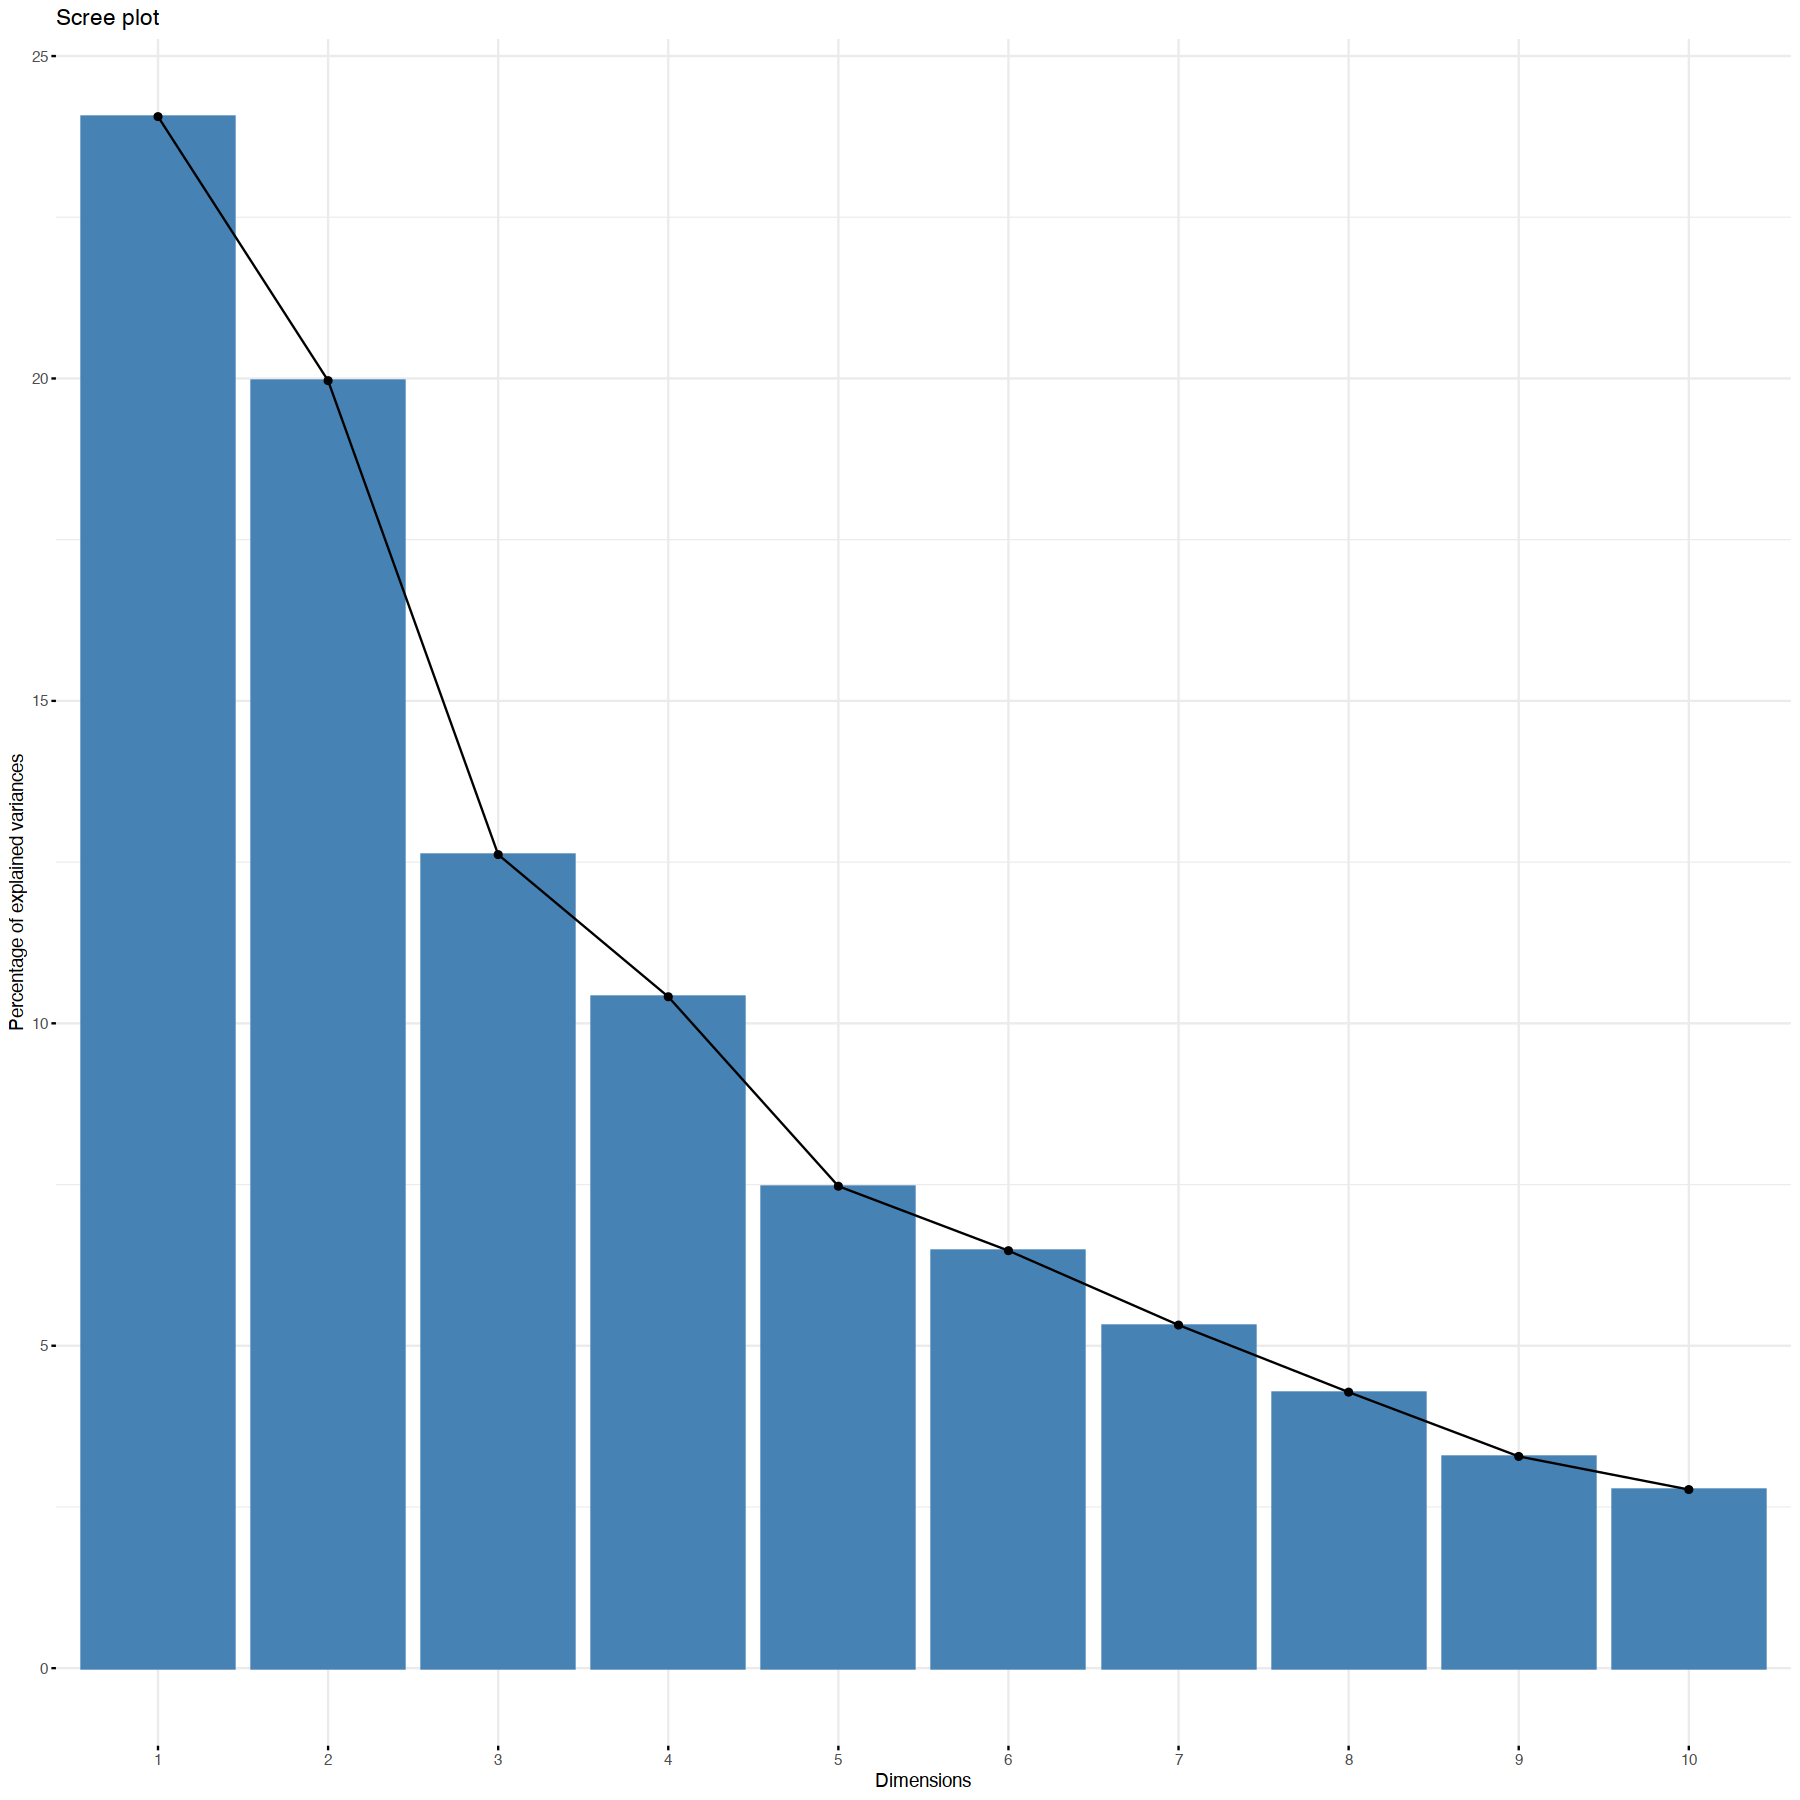

In [14]:
fviz_screeplot(res.famd)

### All variables

In [15]:
var <- get_famd_var(res.famd)
var

FAMD results for variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

In [16]:
# Coordinates of variables
head(var$coord)
# Cos2: quality of representation on the factore map
head(var$cos2)
# Contributions to the  dimensions
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
fixed.acidity,0.77153520,6.621591e-05,0.036608641,0.0664816287,0.0008762218,0.003129636,0.054524477,2.210738e-05,0.007640378,0.011109637
volatile.acidity,0.22966098,1.584131e-01,0.054244787,0.0149595840,0.0422616239,0.364991181,0.062204885,3.298494e-05,0.015558766,0.041712915
citric.acid,0.74576296,8.582840e-03,0.008556843,0.0000139884,0.0004169363,0.042709471,0.006646948,4.012915e-02,0.000151148,0.076954621
residual.sugar,0.12473797,1.053070e-01,0.305500899,0.0621585244,0.0046769118,0.228875721,0.059575064,9.501410e-03,0.047801818,0.043746029
chlorides,0.06159388,1.810285e-01,0.088789139,0.3284826542,0.0246824264,0.006913754,0.187036735,8.941191e-02,0.012762708,0.001110120
free.sulfur.dioxide,0.01607910,3.342604e-01,0.400137856,0.0061489360,0.0249587412,0.037213962,0.009556779,2.854268e-02,0.080047896,0.002122956


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
fixed.acidity,0.5952665721,4.384547e-09,1.340193e-03,4.419807e-03,7.677646e-07,9.794619e-06,2.972919e-03,4.887363e-10,5.837538e-05,1.234240e-04
volatile.acidity,0.0527441663,2.509471e-02,2.942497e-03,2.237892e-04,1.786045e-03,1.332186e-01,3.869448e-03,1.088006e-09,2.420752e-04,1.739967e-03
citric.acid,0.5561623982,7.366514e-05,7.321956e-05,1.956755e-10,1.738359e-07,1.824099e-03,4.418192e-05,1.610349e-03,2.284573e-08,5.922014e-03
residual.sugar,0.0155595603,1.108957e-02,9.333080e-02,3.863682e-03,2.187350e-05,5.238410e-02,3.549188e-03,9.027679e-05,2.285014e-03,1.913715e-03
chlorides,0.0037938056,3.277133e-02,7.883511e-03,1.079009e-01,6.092222e-04,4.779999e-05,3.498274e-02,7.994490e-03,1.628867e-04,1.232367e-06
free.sulfur.dioxide,0.0002585374,1.117300e-01,1.601103e-01,3.780941e-05,6.229388e-04,1.384879e-03,9.133202e-05,8.146847e-04,6.407666e-03,4.506943e-06


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
fixed.acidity,24.6660905,0.002551042,2.2320533,4.911584675,0.09018181,0.3718434,7.8830241,0.003972884,1.78988130,3.0854589
volatile.acidity,7.3422943,6.103041797,3.3073409,1.105196505,4.34961796,43.3659264,8.9934400,0.005927673,3.64489077,11.5848503
citric.acid,23.8421482,0.330663518,0.5217164,0.001033447,0.04291159,5.0744672,0.9610006,7.211548007,0.03540886,21.3724639
residual.sugar,3.9878906,4.057071409,18.6265937,4.592198803,0.48135347,27.1935548,8.6132265,1.707483718,11.19834323,12.1495034
chlorides,1.9691650,6.974327456,5.4135331,24.267912832,2.54034548,0.8214482,27.0413433,16.068076858,2.98986928,0.3083117
free.sulfur.dioxide,0.5140511,12.877757102,24.3966721,0.454276173,2.56878413,4.4215258,1.3816972,5.129361295,18.75250463,0.5896047


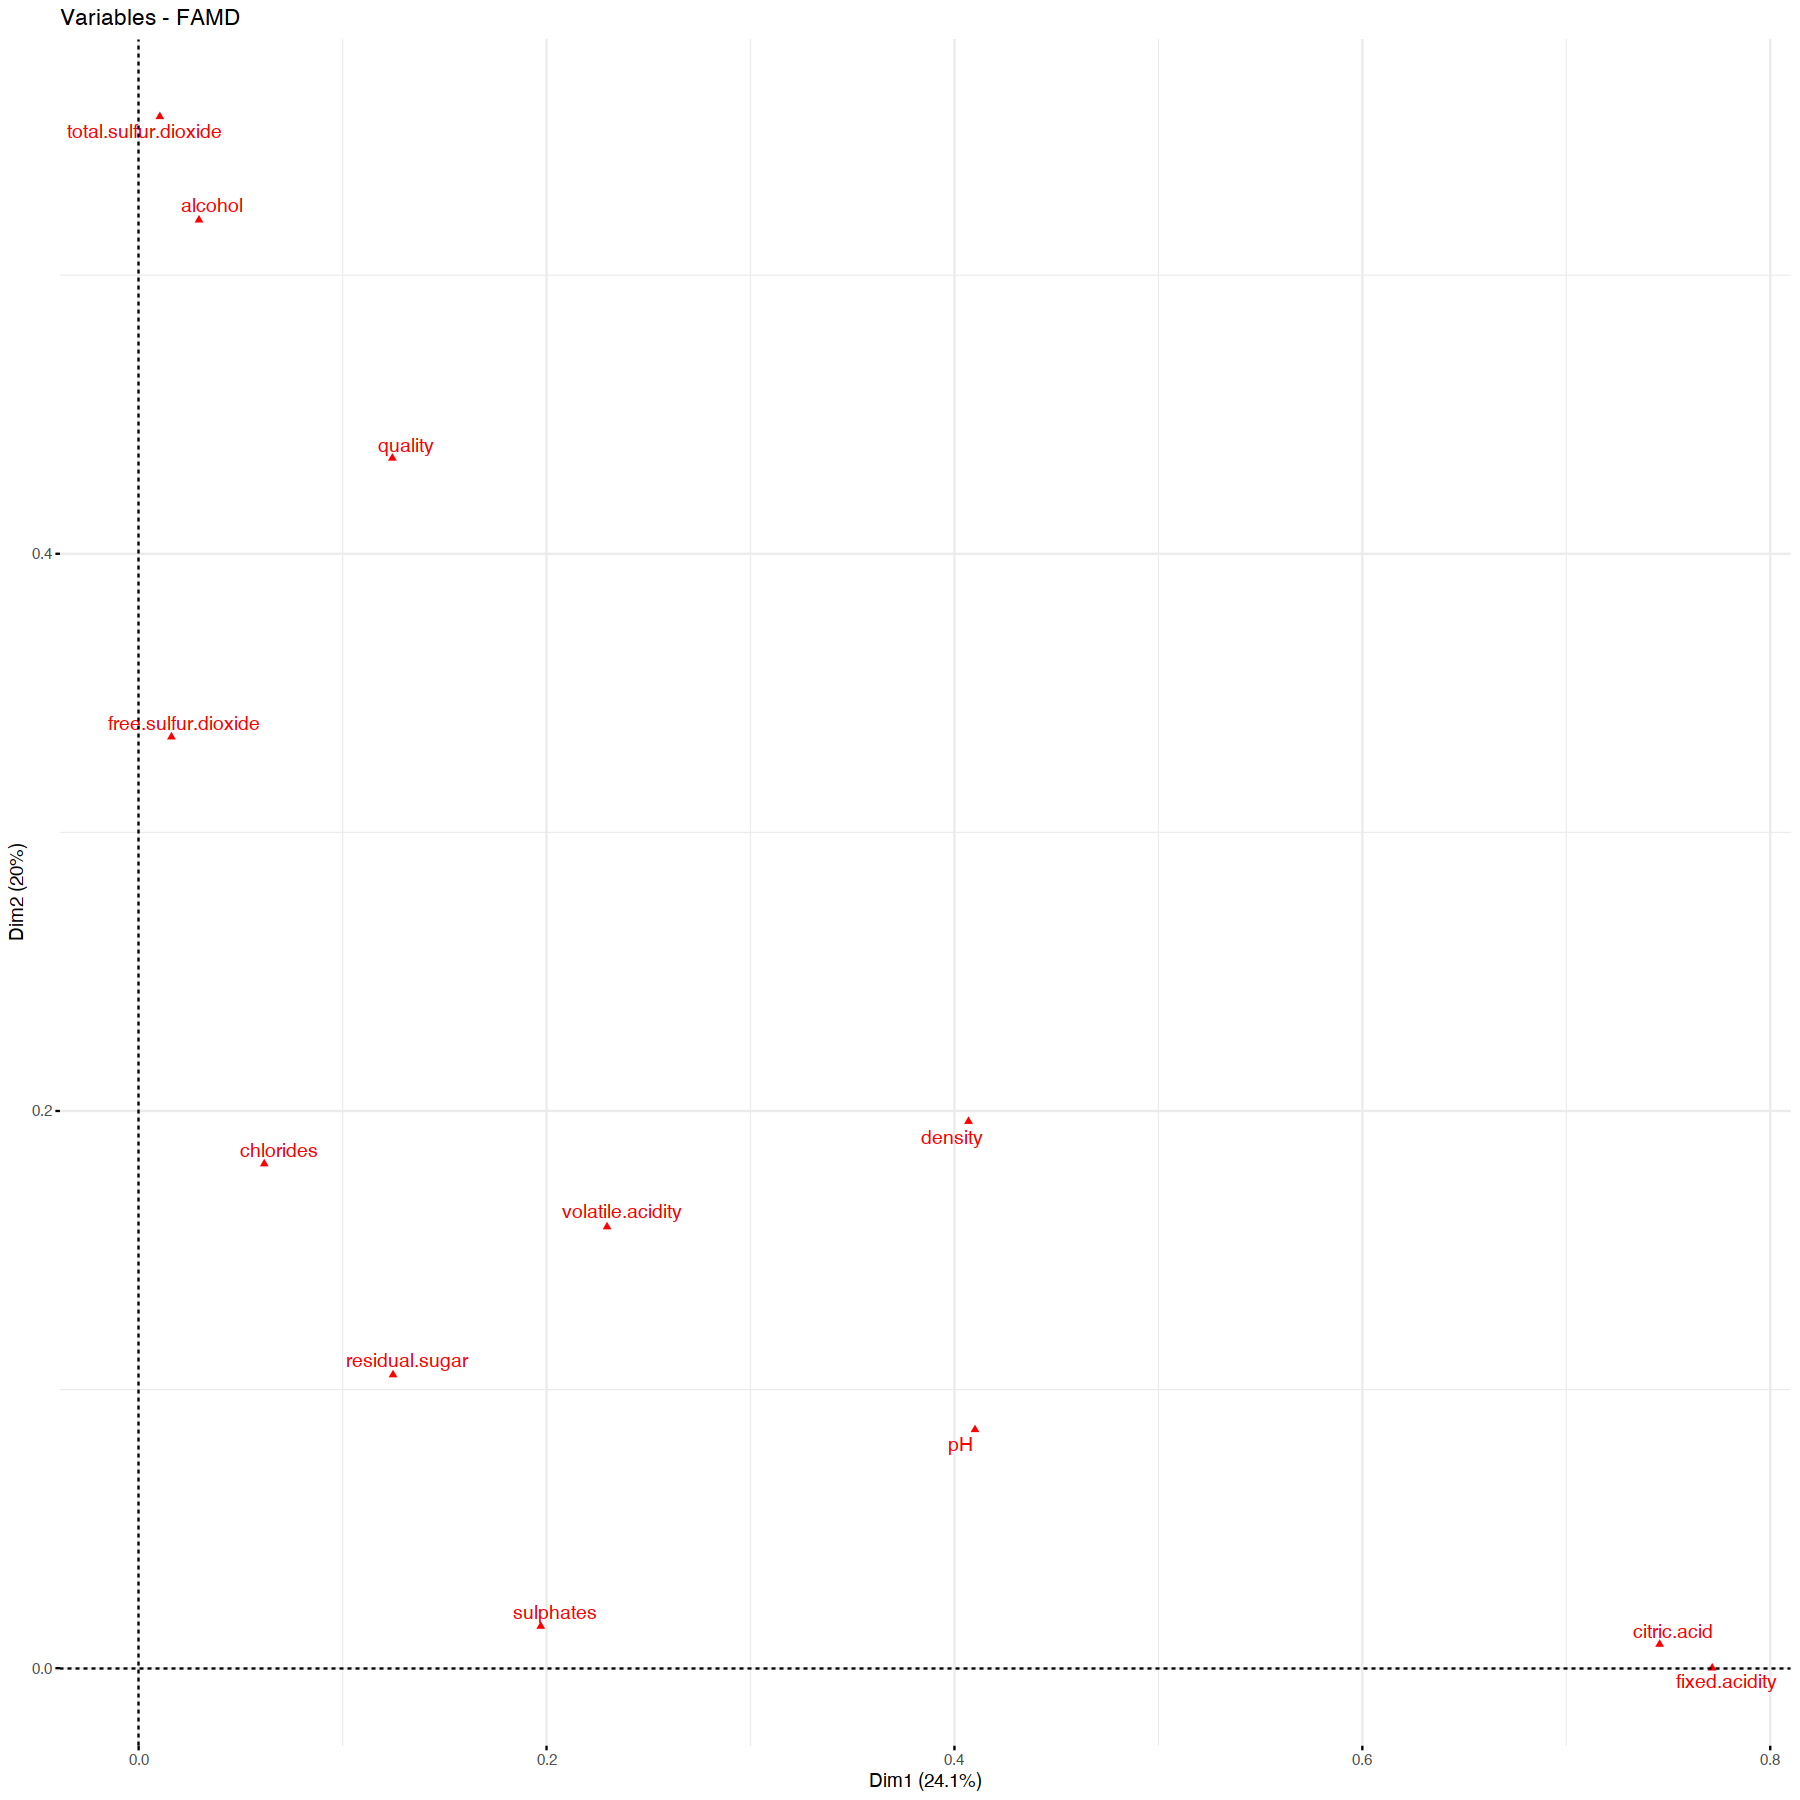

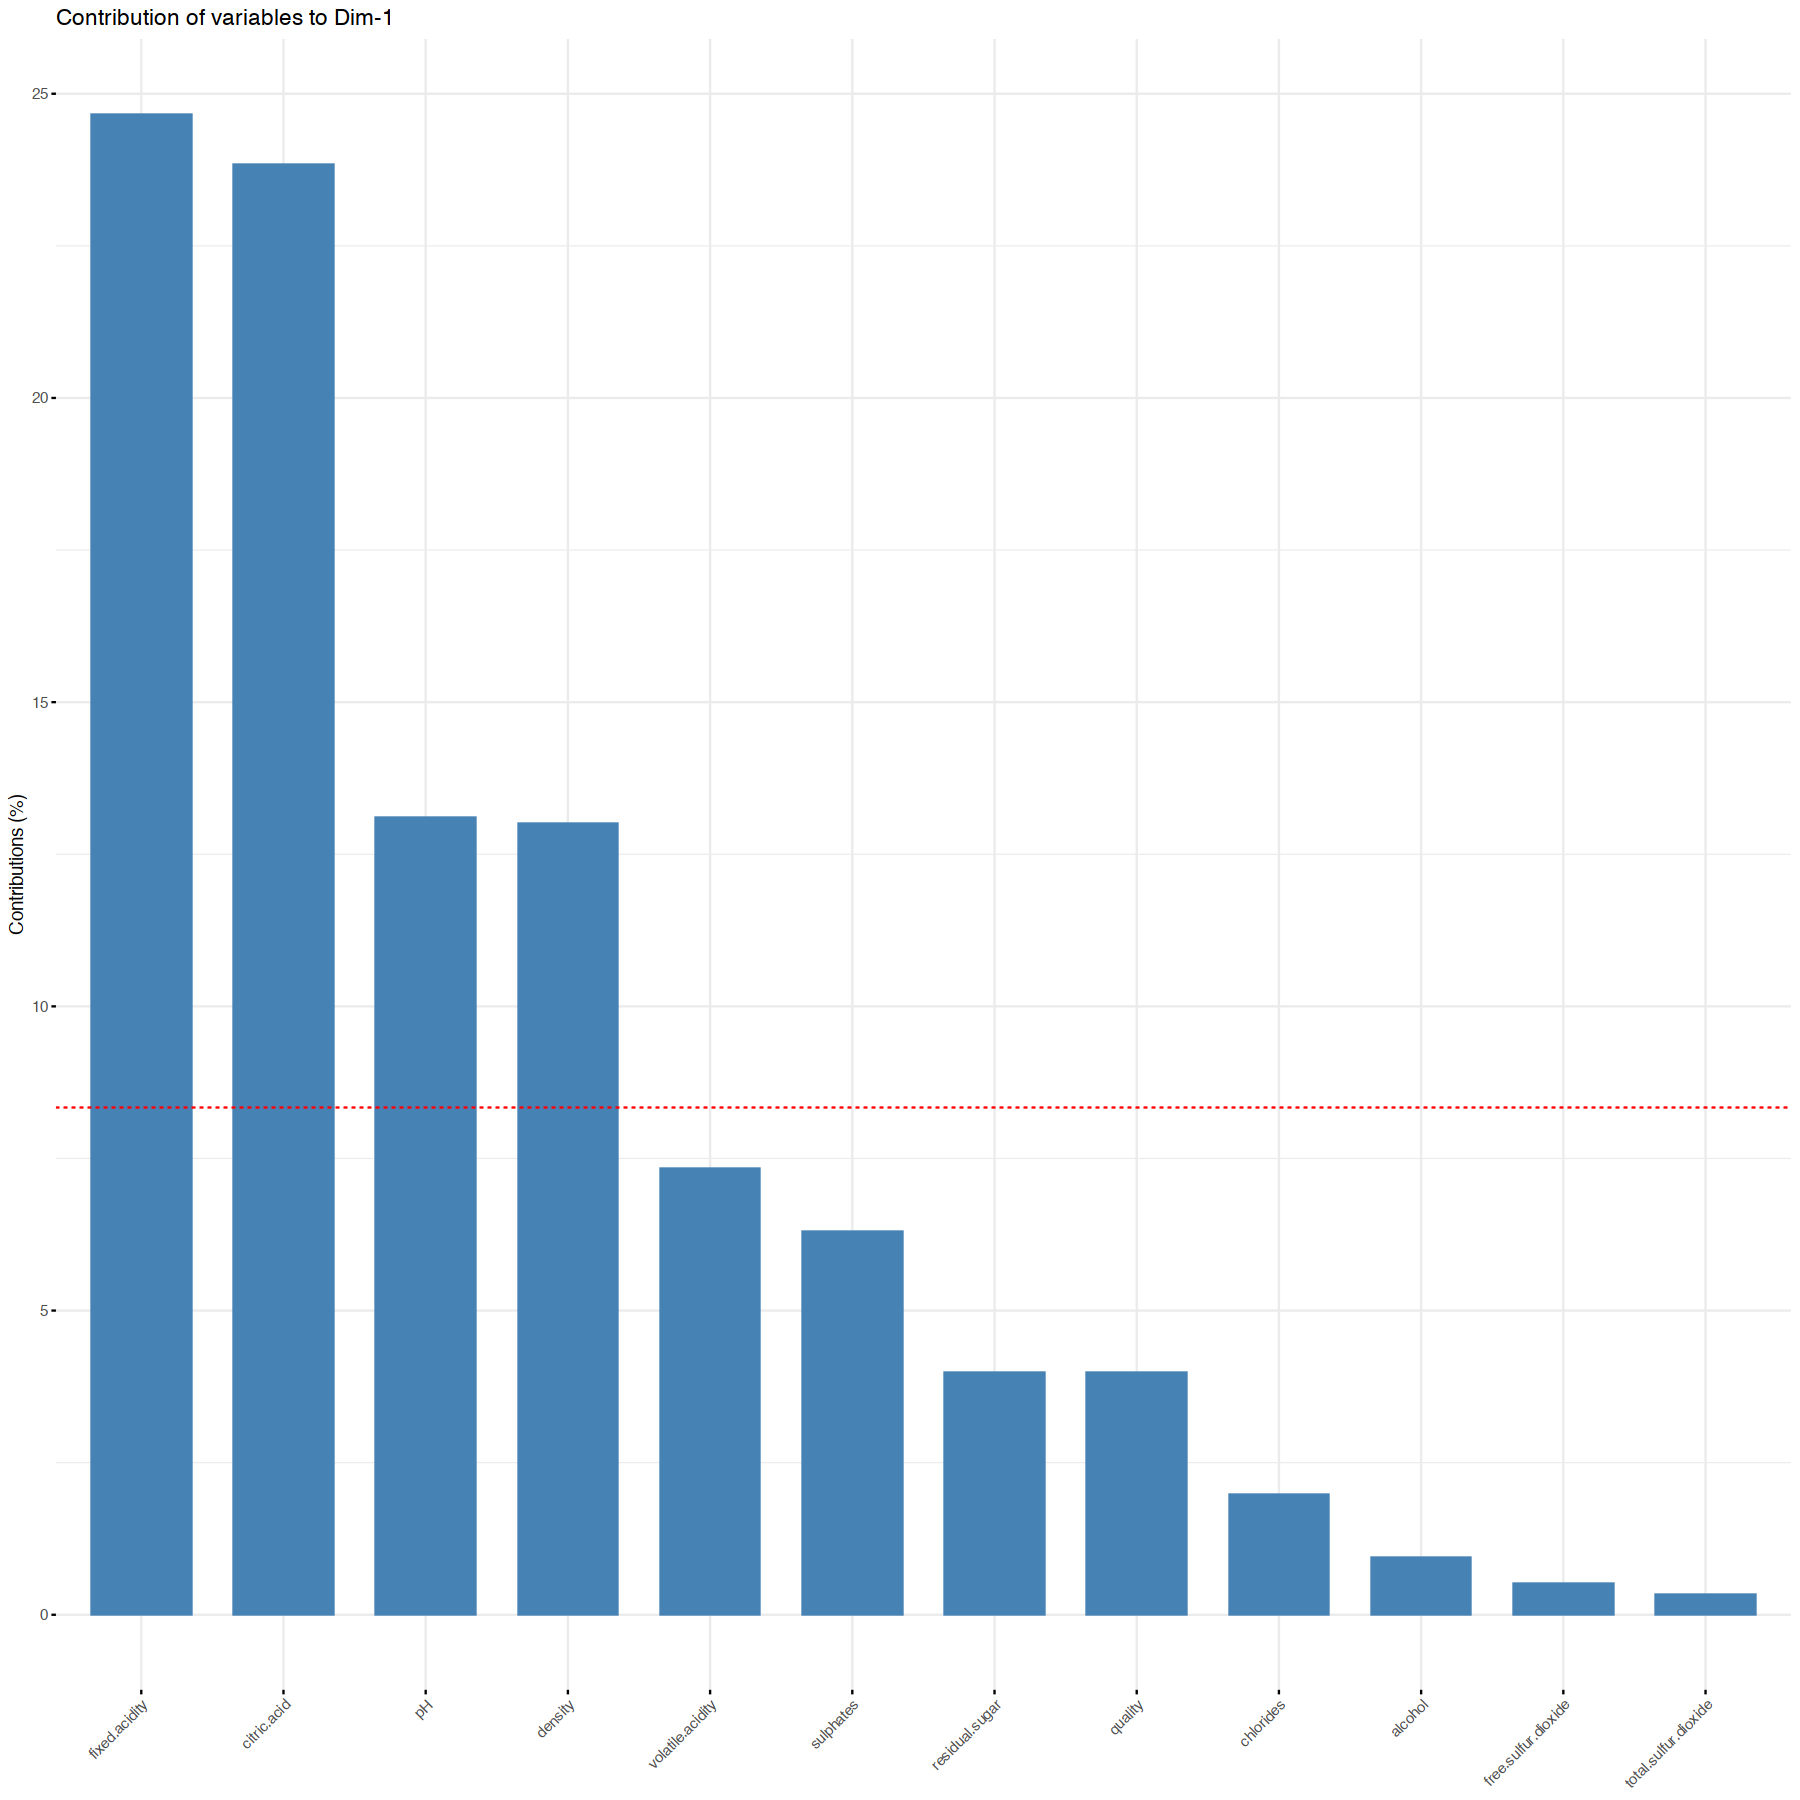

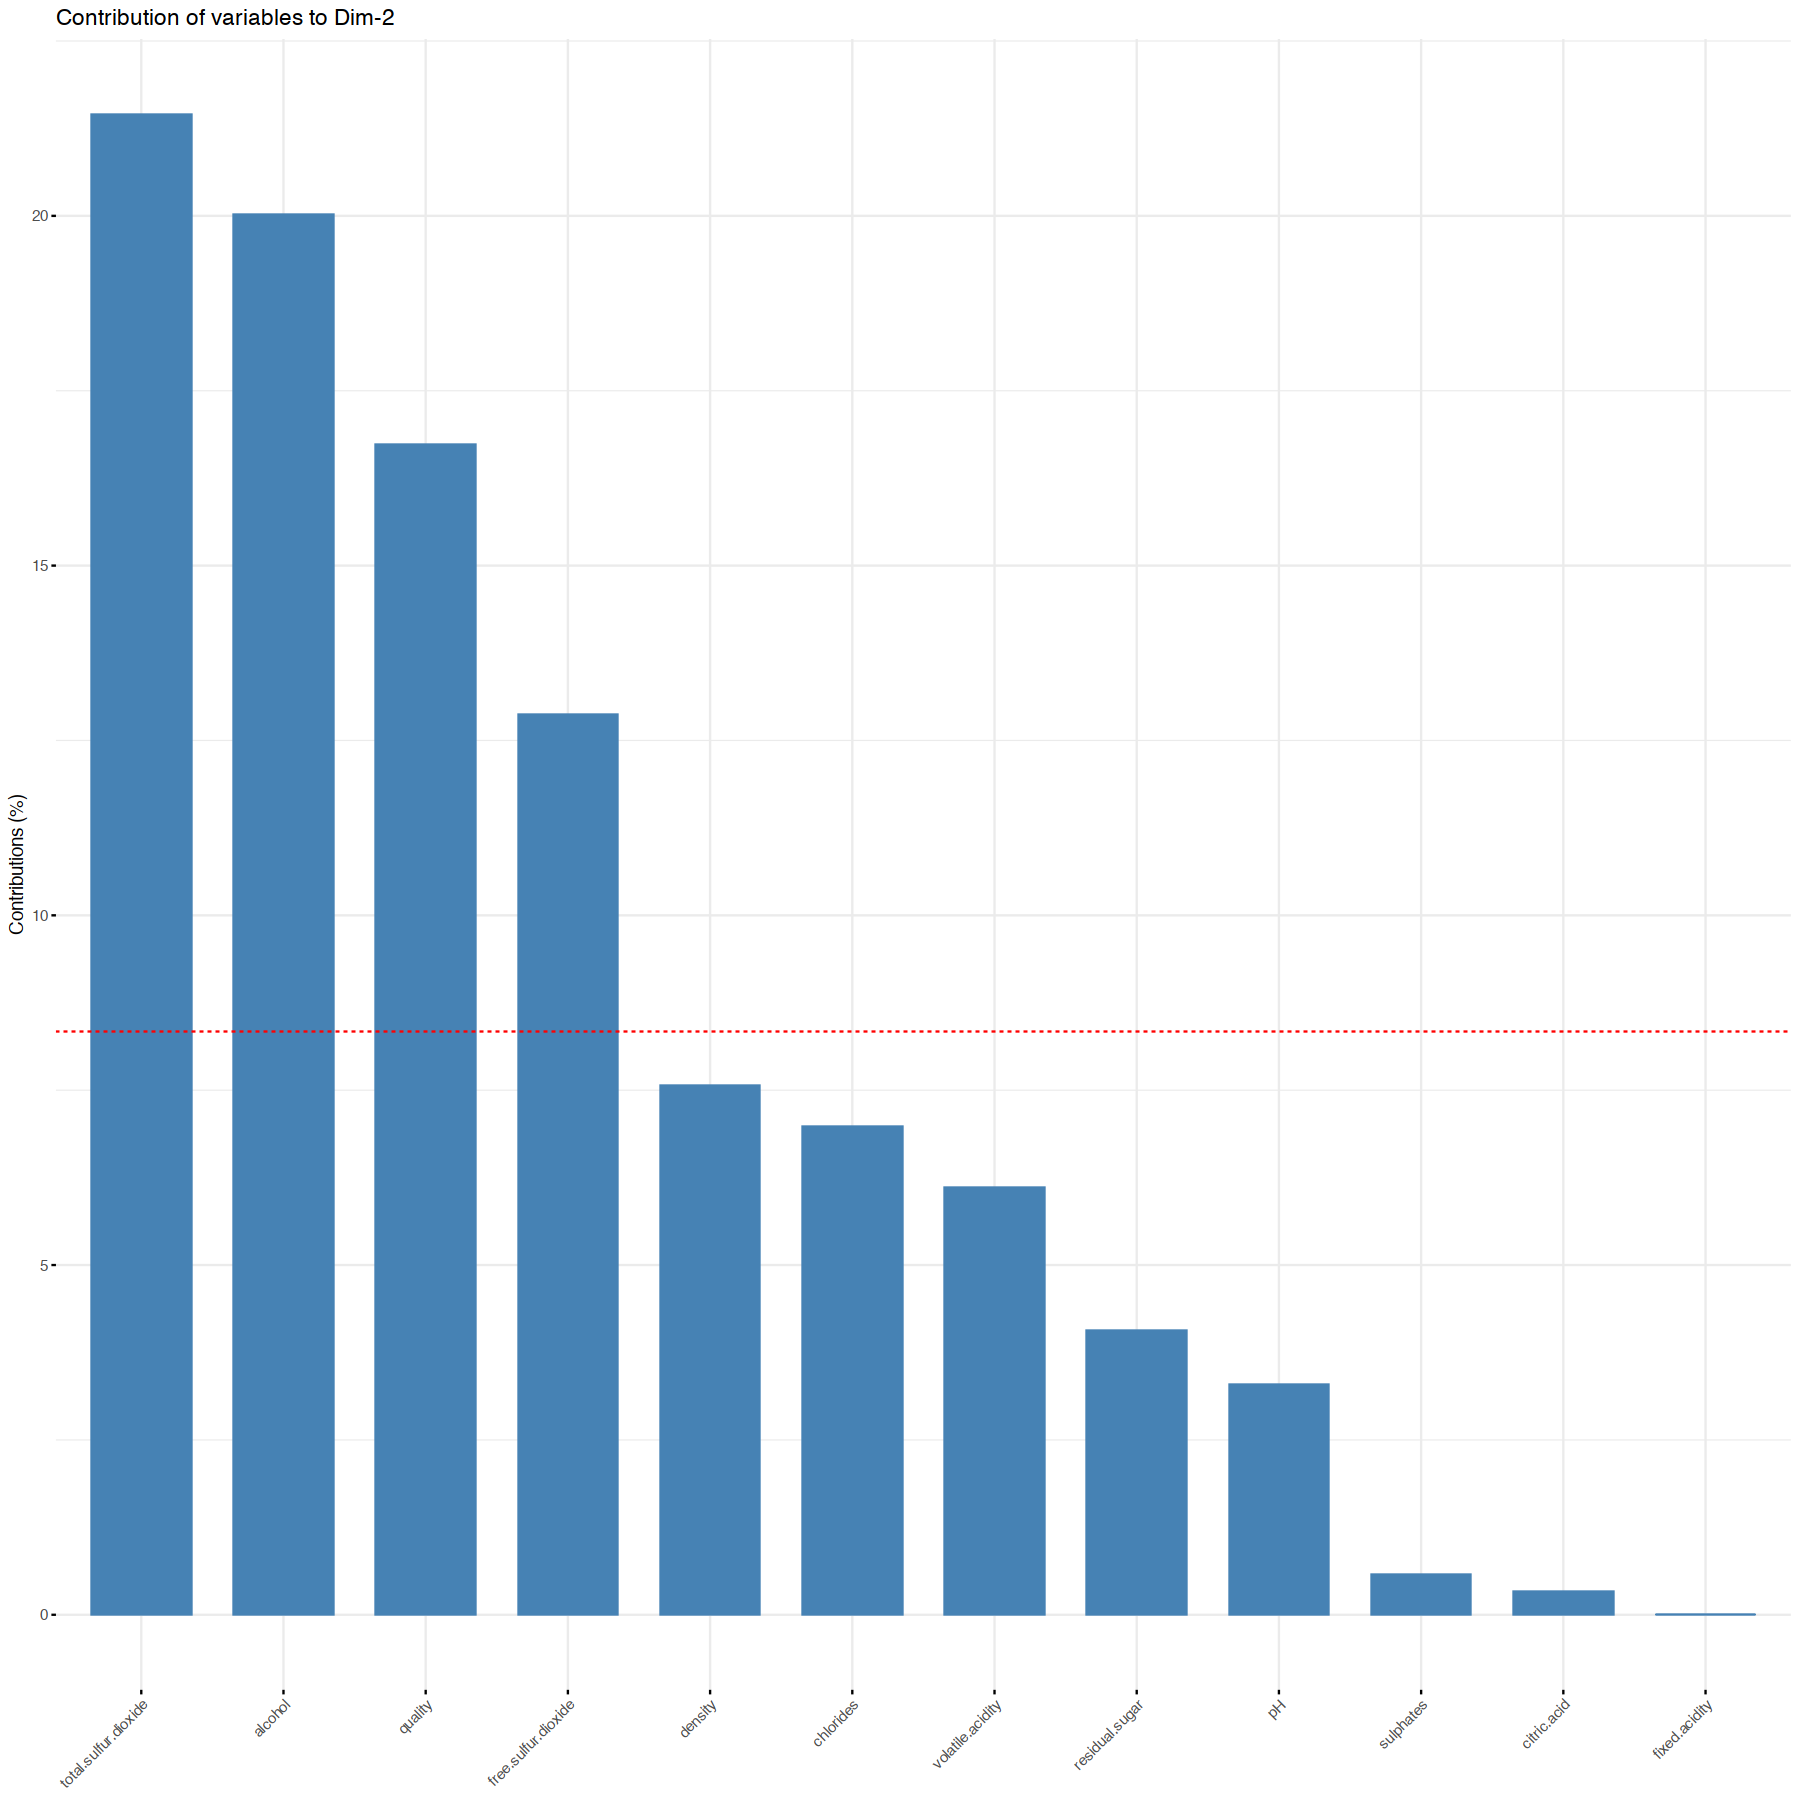

In [17]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

### Quantitative variables

In [18]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var 

FAMD results for quantitative variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

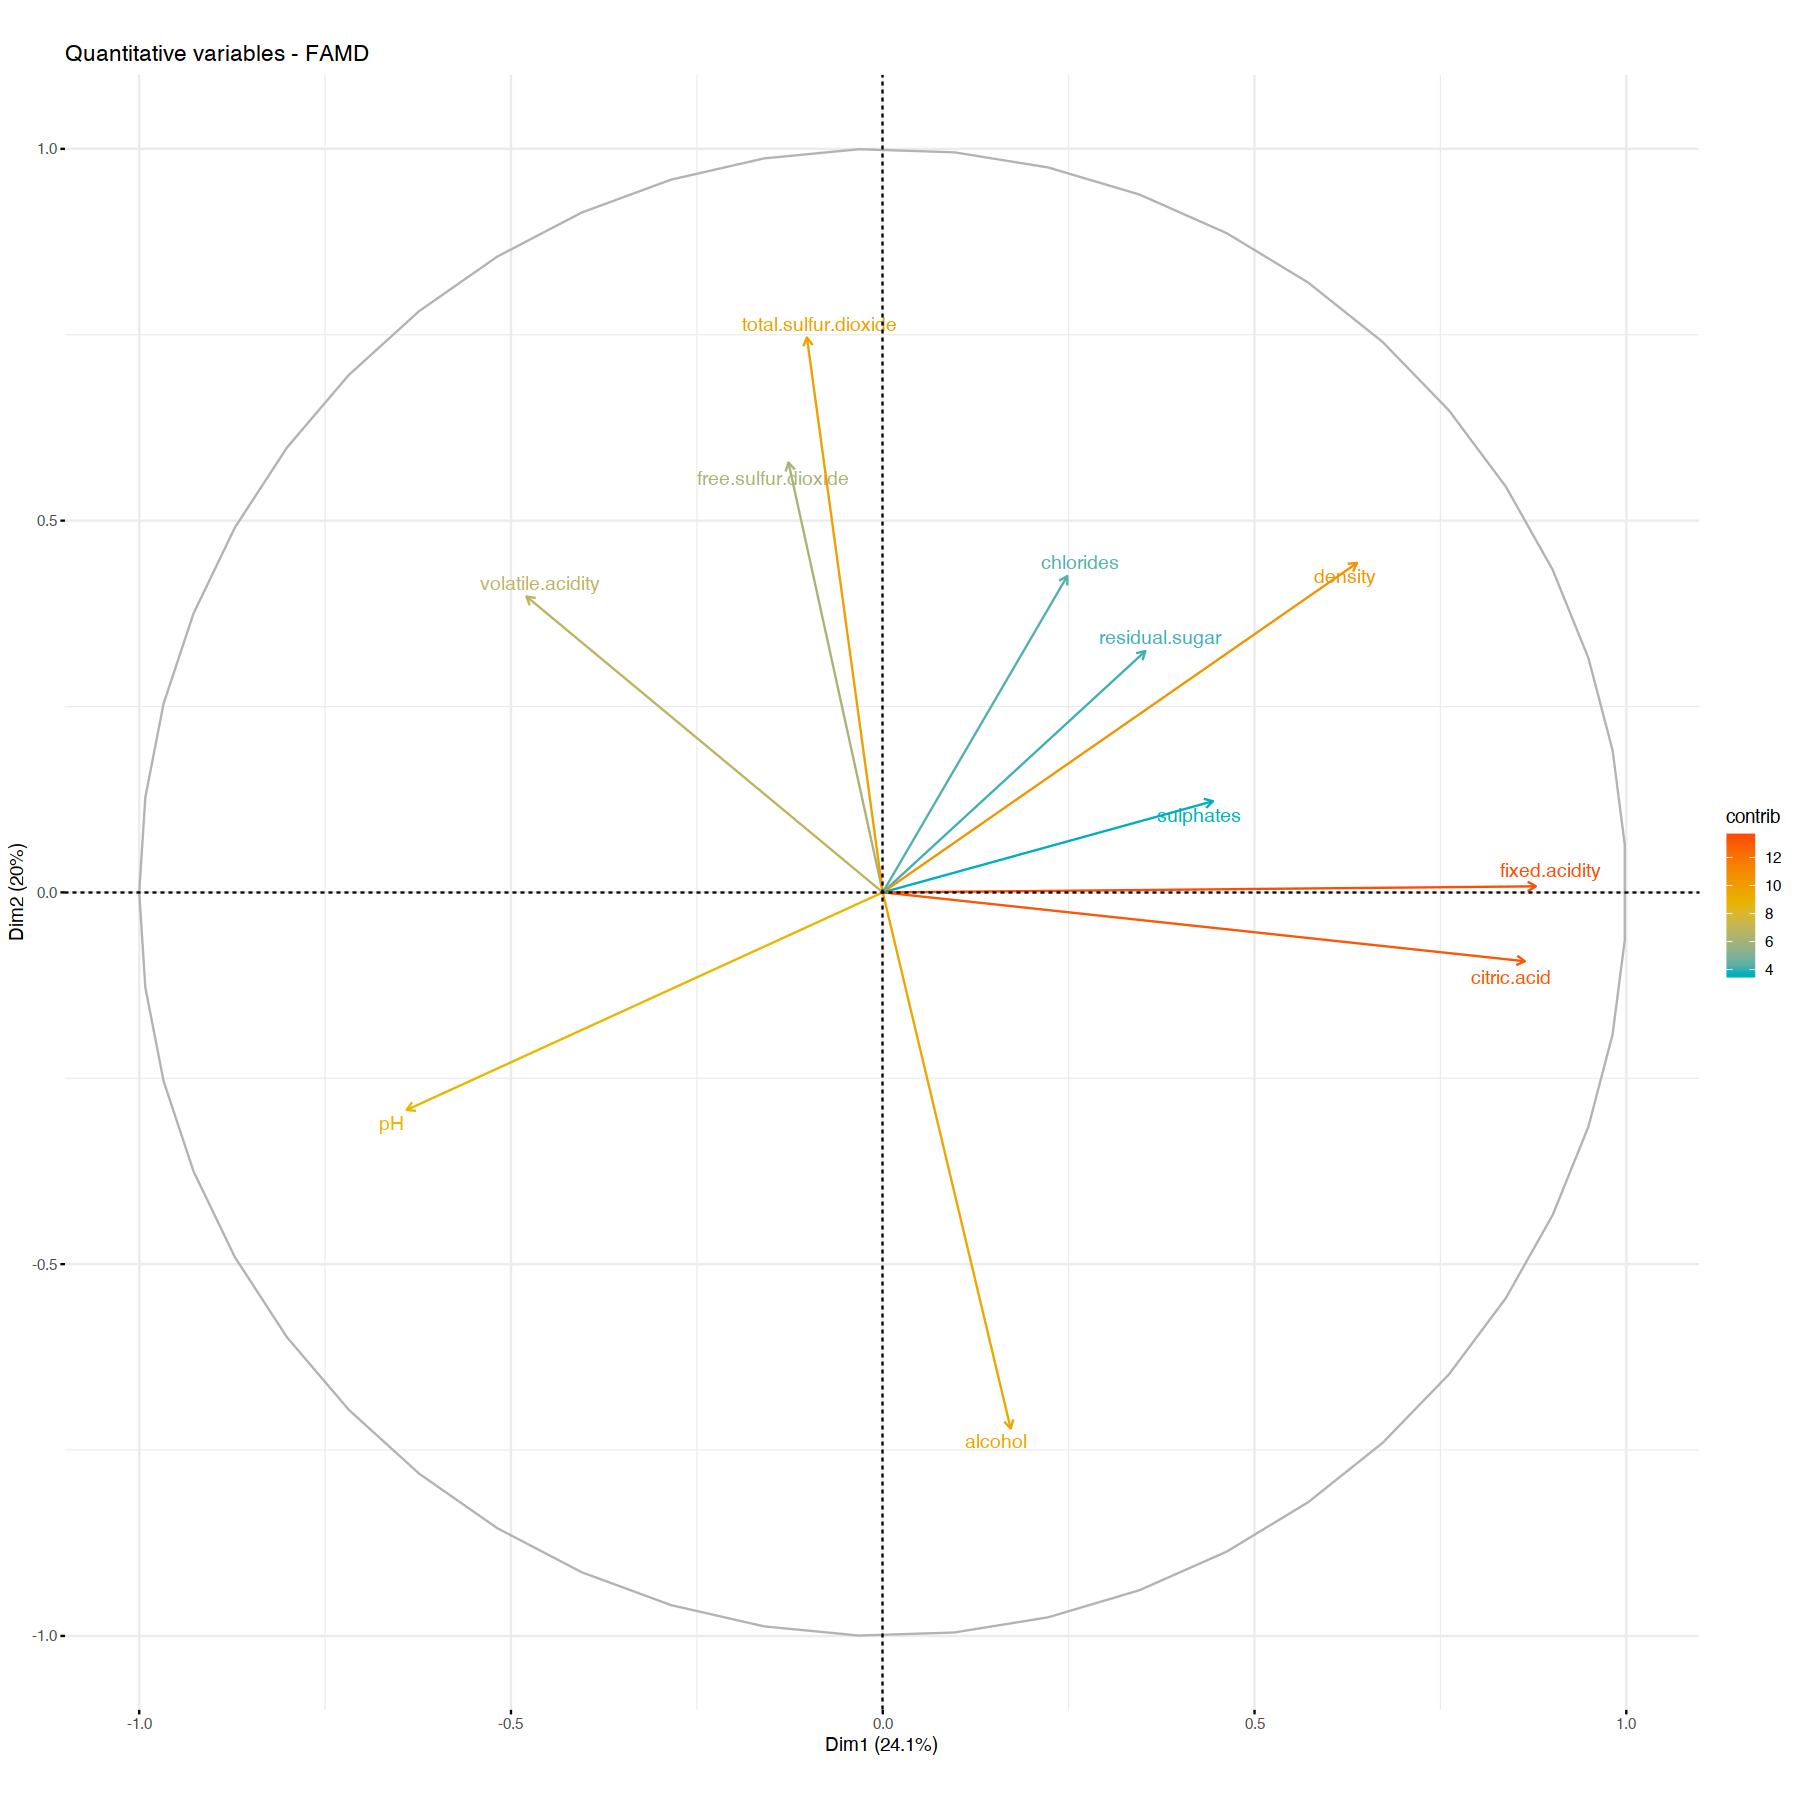

In [19]:
fviz_famd_var(res.famd, "quanti.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

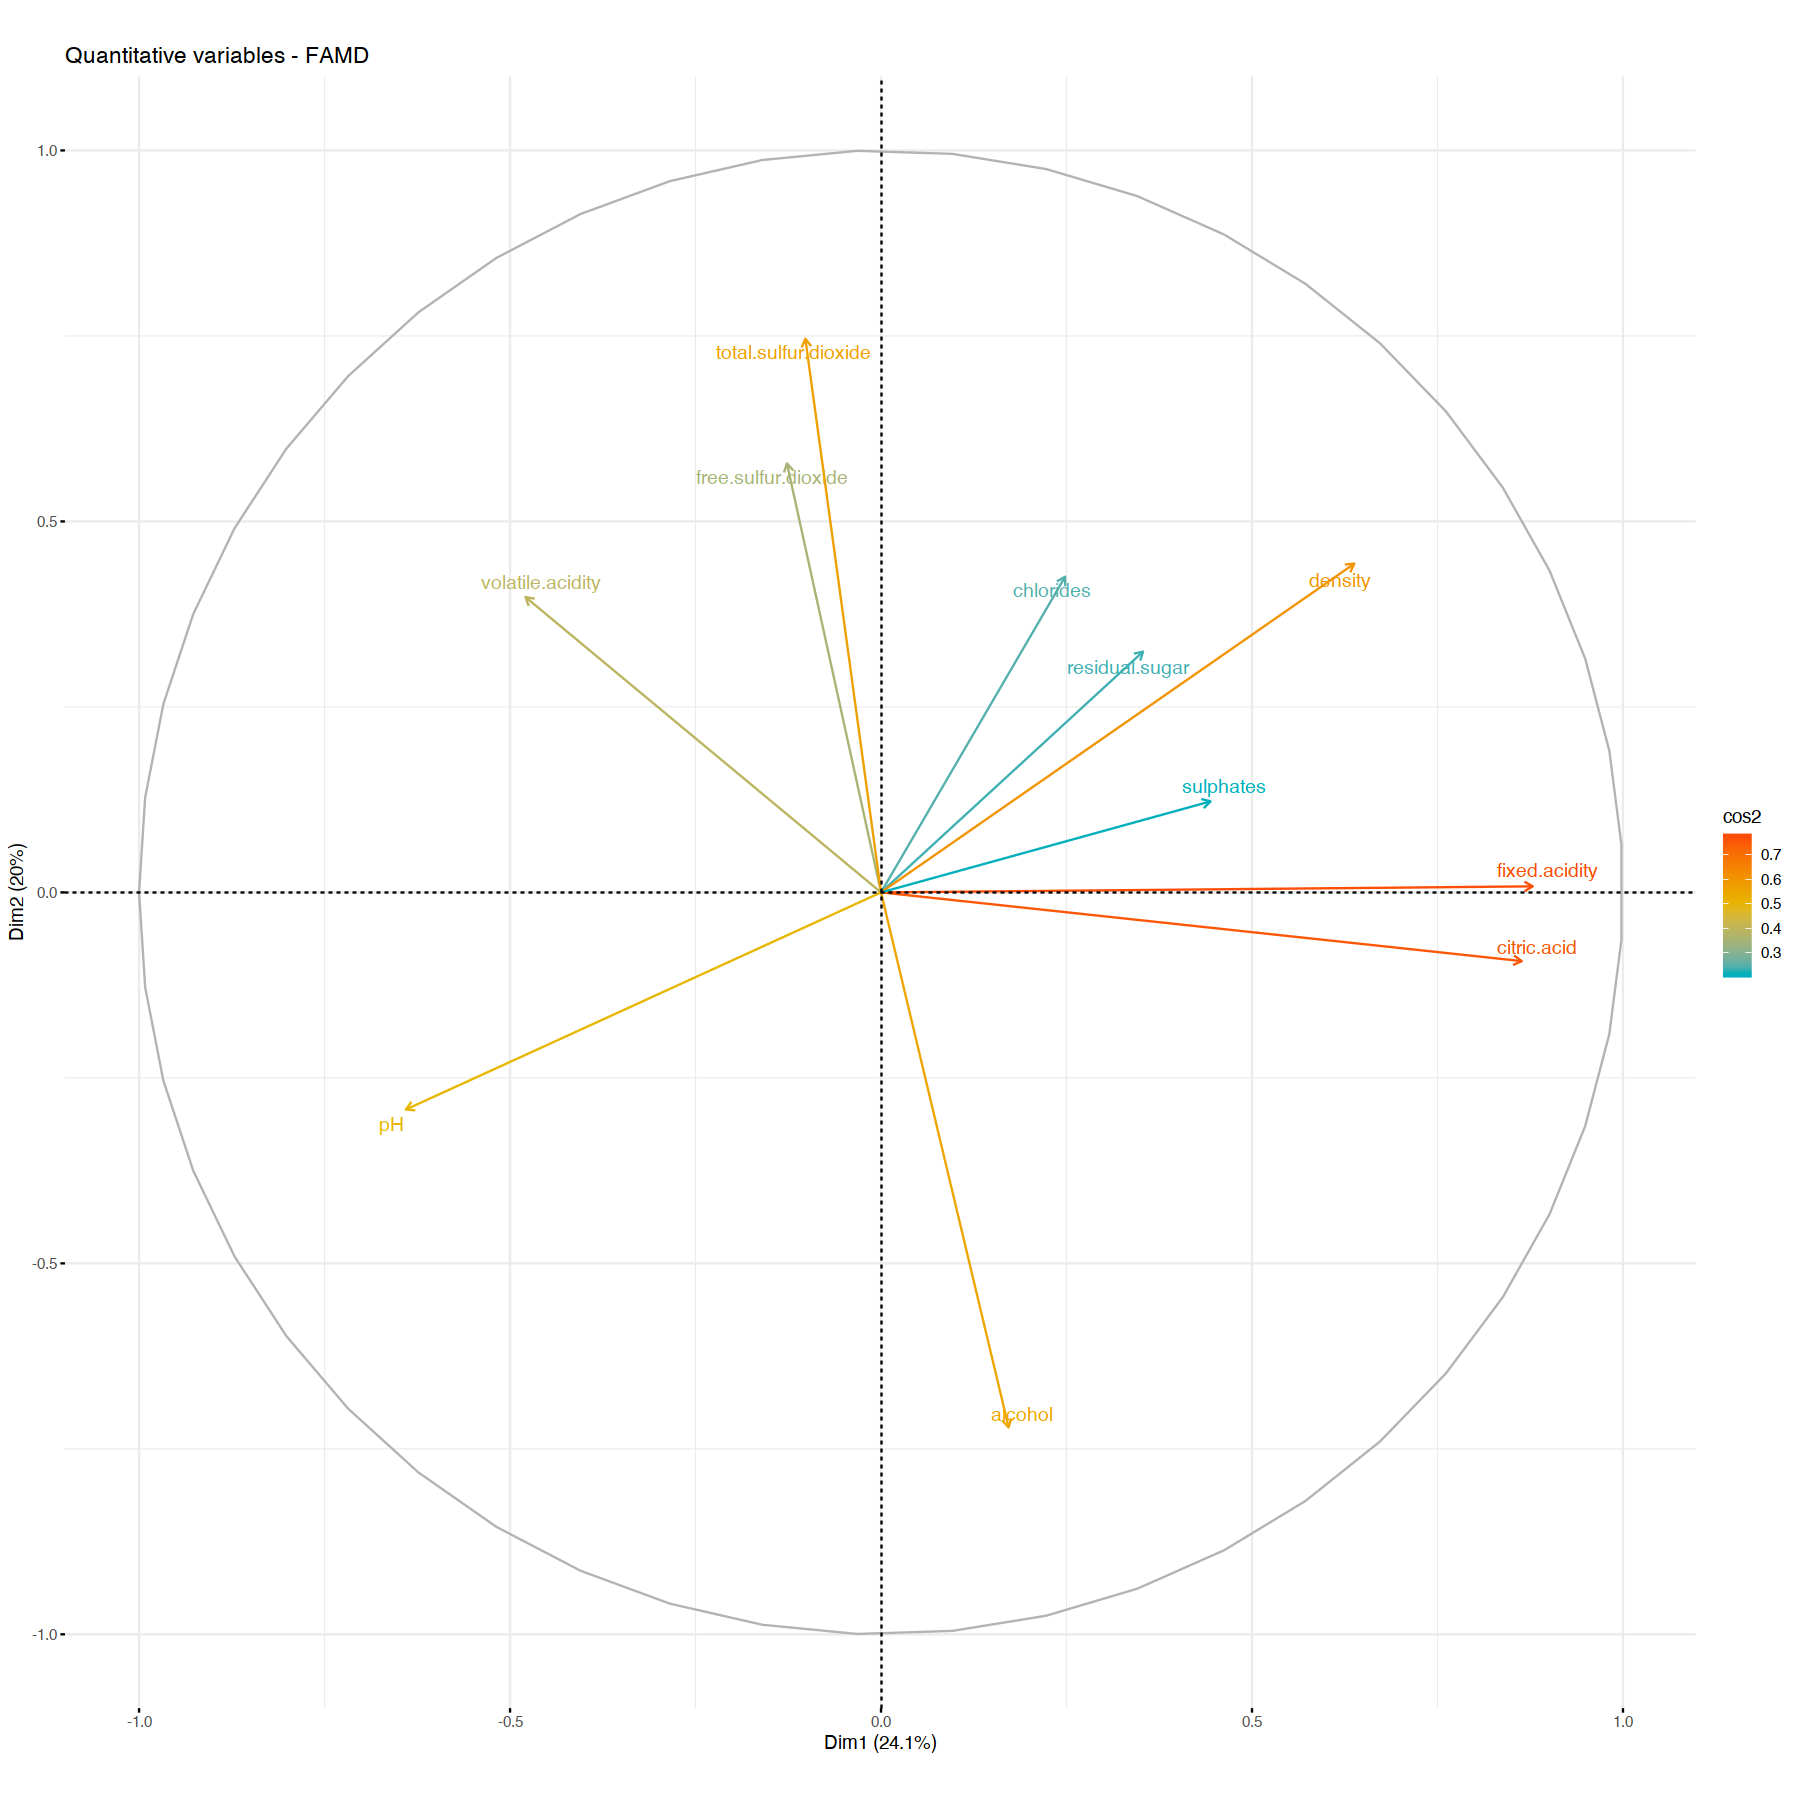

In [20]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

### Graph of qualitative variables

In [21]:
quali.var <- get_famd_var(res.famd, "quali.var")
quali.var 

FAMD results for qualitative variable categories 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

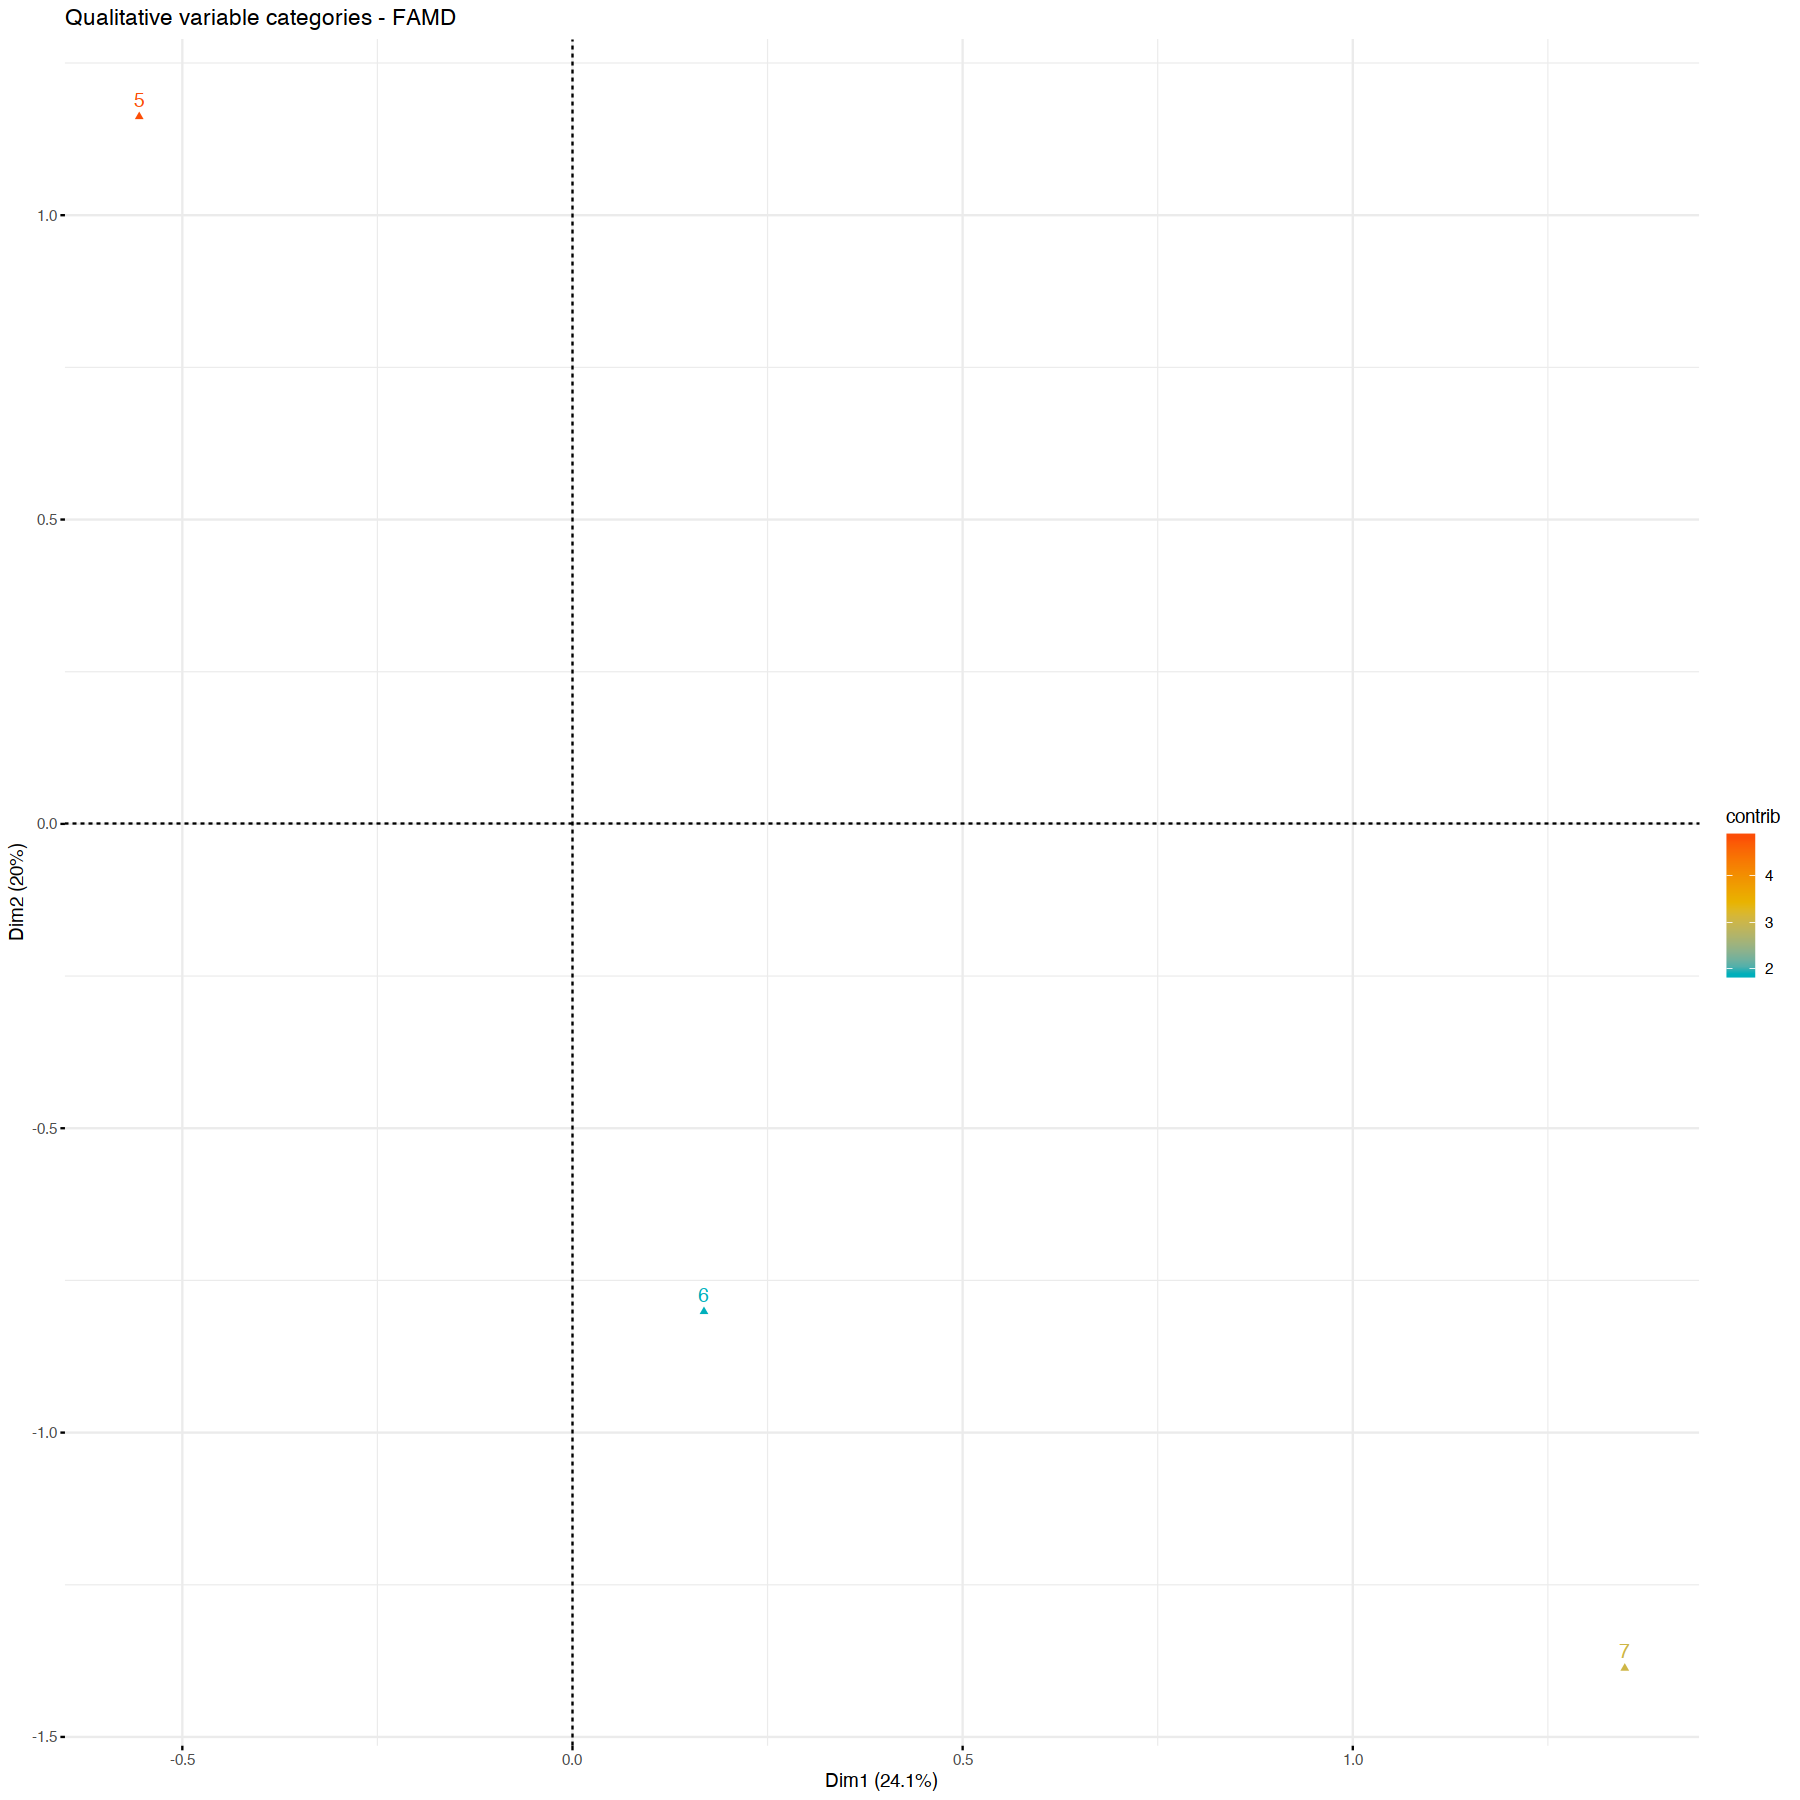

In [22]:
fviz_famd_var(res.famd, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

### Graph of individuals

In [23]:
ind <- get_famd_ind(res.famd)
ind

FAMD results for individuals 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

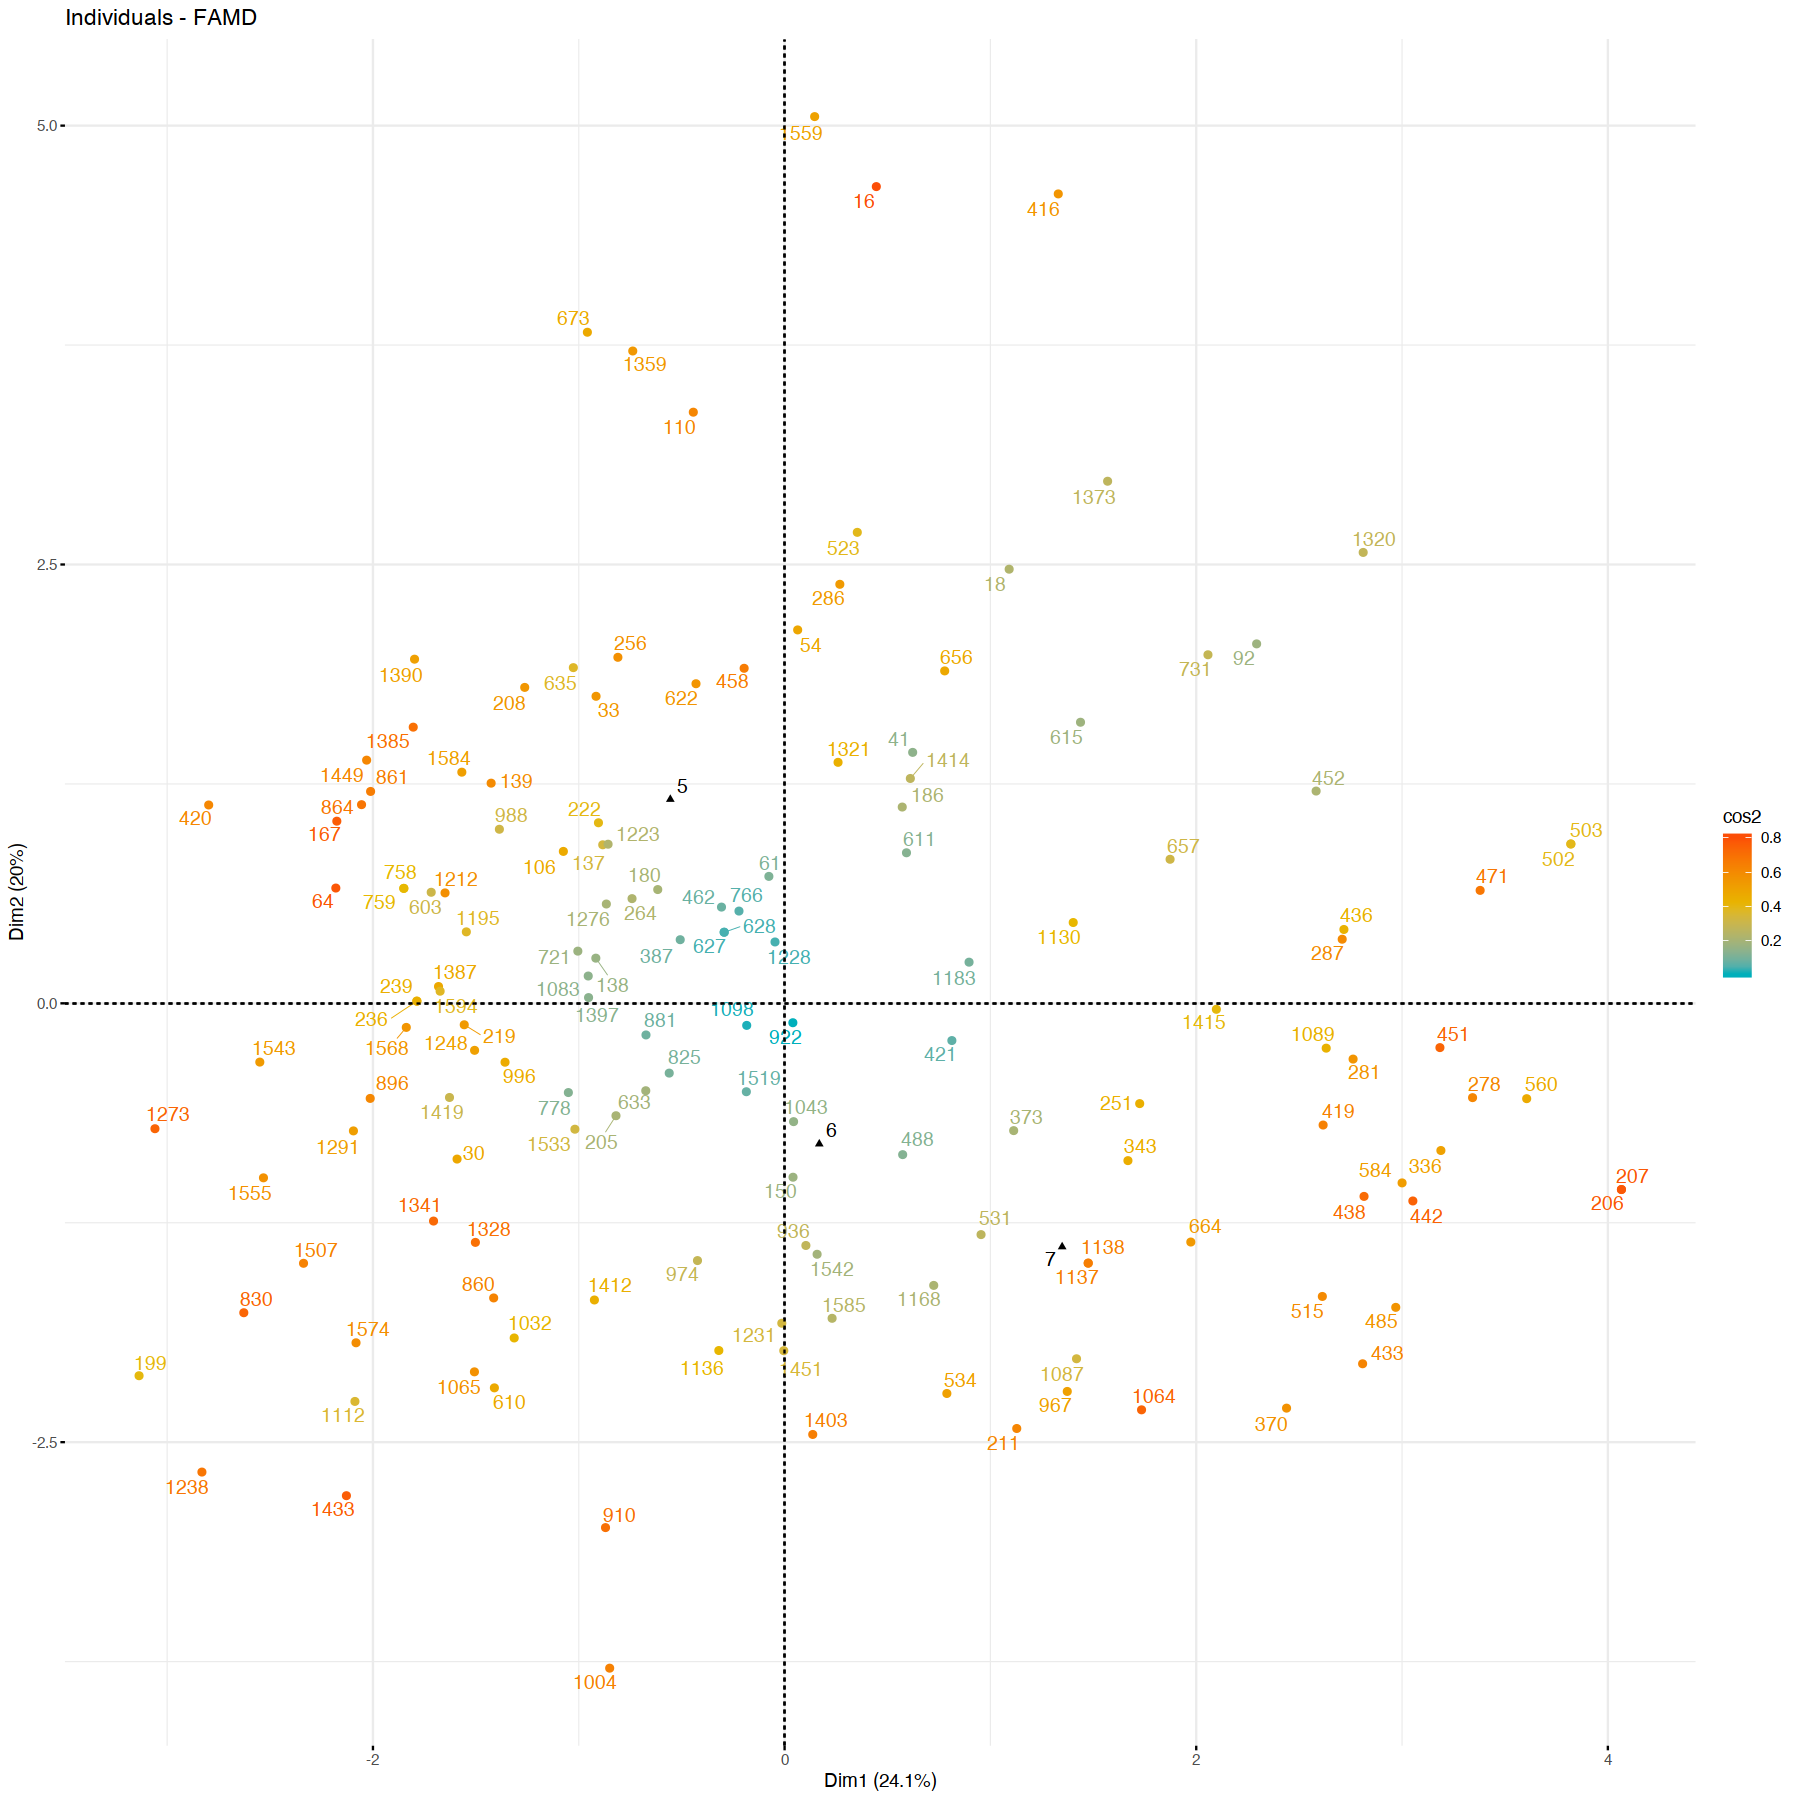

In [24]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

In [25]:
fviz_mfa_ind(res.famd, 
             habillage = "Label", # color by groups 
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             ) 

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 0, 152


In [ ]:
fviz_ellipses(res.famd, c("Label", "Soil"), repel = TRUE)


In [ ]:
fviz_ellipses(res.famd, 1:2, geom = "point")
